In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
speed_2022 = pd.read_csv('pitch_arsenals_2022.csv')

In [3]:
speed_2021 = pd.read_csv('pitch_arsenals_2021.csv')
speed_2020 = pd.read_csv('pitch_arsenals_2020.csv')
speed_2019 = pd.read_csv('pitch_arsenals_2019.csv')

In [4]:
speed_2022['year'] = 2022
speed_2021['year'] = 2021
speed_2020['year'] = 2020
speed_2019['year'] = 2019

In [5]:
speed_2022

,last_name,first_name,pitcher,ff_avg_speed,si_avg_speed,fc_avg_speed,sl_avg_speed,ch_avg_speed,cu_avg_speed,fs_avg_speed,kn_avg_speed,year
0,Alcantara,Sandy,645261,97.9,97.7,NaN,89.7,91.8,86.2,NaN,NaN,2022
1,Cole,Gerrit,543037,97.8,NaN,92.1,88.6,89.8,83.0,NaN,NaN,2022
2,Burnes,Corbin,669203,96.2,96.3,95.0,87.9,90.3,81.8,NaN,NaN,2022
3,Mikolas,Miles,571945,93.6,92.9,NaN,87.8,82.6,76.1,NaN,NaN,2022
4,Lyles,Jordan,543475,91.8,90.9,83.8,80.0,86.3,79.0,NaN,NaN,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
540,Bruihl,Justin,677865,NaN,88.5,86.2,76.9,NaN,NaN,NaN,NaN,2022
541,Yacabonis,Jimmy,642231,NaN,93.9,NaN,81.7,87.7,NaN,NaN,NaN,2022
542,Stout,Eric,657770,92.3,NaN,NaN,80.4,87.6,NaN,NaN,NaN,2022
543,Scott,Tayler,605463,94.2,93.5,NaN,83.9,89.2,NaN,NaN,NaN,2022


In [6]:
def sort(filename):
    filename['player_name'] = filename[['last_name',' first_name']].agg(' '.join, axis=1)
    filename.drop(columns=['last_name',' first_name','pitcher','kn_avg_speed'],axis=1, inplace=True)

In [7]:
sort(speed_2022)
sort(speed_2021)
sort(speed_2020)
sort(speed_2019)

In [8]:
df_22 = speed_2022.melt(id_vars=['player_name','year'], value_vars=['ff_avg_speed','si_avg_speed','fc_avg_speed',
                                                                     'sl_avg_speed','ch_avg_speed','cu_avg_speed','fs_avg_speed'])
df_22.rename(columns=({'variable':'pitch_type','value':'average_speed'}),inplace = True)
df_22['pitch_type'] = df_22['pitch_type'].str.replace('_avg_speed','')
df_22 = pd.get_dummies(data=df_22, columns=['pitch_type'])

In [9]:
df_21 = speed_2021.melt(id_vars=['player_name','year'], value_vars=['ff_avg_speed','si_avg_speed','fc_avg_speed',
                                                                     'sl_avg_speed','ch_avg_speed','cu_avg_speed','fs_avg_speed'])
df_21.rename(columns=({'variable':'pitch_type','value':'average_speed'}),inplace = True)
df_21['pitch_type'] = df_21['pitch_type'].str.replace('_avg_speed','')
df_21 = pd.get_dummies(data=df_21, columns=['pitch_type'])

In [10]:
df_20 = speed_2020.melt(id_vars=['player_name','year'], value_vars=['ff_avg_speed','si_avg_speed','fc_avg_speed',
                                                                     'sl_avg_speed','ch_avg_speed','cu_avg_speed','fs_avg_speed'])
df_20.rename(columns=({'variable':'pitch_type','value':'average_speed'}),inplace = True)
df_20['pitch_type'] = df_20['pitch_type'].str.replace('_avg_speed','')
df_20 = pd.get_dummies(data=df_20, columns=['pitch_type'])

In [11]:
df_19 = speed_2019.melt(id_vars=['player_name','year'], value_vars=['ff_avg_speed','si_avg_speed','fc_avg_speed',
                                                                     'sl_avg_speed','ch_avg_speed','cu_avg_speed','fs_avg_speed'])
df_19.rename(columns=({'variable':'pitch_type','value':'average_speed'}),inplace = True)
df_19['pitch_type'] = df_19['pitch_type'].str.replace('_avg_speed','')
df_19 = pd.get_dummies(data=df_19, columns=['pitch_type'])

In [12]:
velocity = pd.concat([speed_2022,speed_2021,speed_2020,speed_2019])

In [13]:
velo = pd.concat([df_22,df_21,df_20,df_19],ignore_index=True).dropna()

In [14]:
velo

,player_name,year,average_speed,pitch_type_ch,pitch_type_cu,pitch_type_fc,pitch_type_ff,pitch_type_fs,pitch_type_si,pitch_type_sl
0,Alcantara Sandy,2022,97.9,0,0,0,1,0,0,0
1,Cole Gerrit,2022,97.8,0,0,0,1,0,0,0
2,Burnes Corbin,2022,96.2,0,0,0,1,0,0,0
3,Mikolas Miles,2022,93.6,0,0,0,1,0,0,0
4,Lyles Jordan,2022,91.8,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
15234,Faria Jake,2019,82.4,0,0,0,0,1,0,0
15264,Sipp Tony,2019,78.0,0,0,0,0,1,0,0
15293,Garrett Reed,2019,88.0,0,0,0,0,1,0,0
15299,Grotz Zac,2019,82.3,0,0,0,0,1,0,0


In [15]:
spin_2022 = pd.read_csv('pitch_arsenals_spin_2022.csv')
spin_2021 = pd.read_csv('pitch_arsenals_spin_2021.csv')
spin_2020 = pd.read_csv('pitch_arsenals_spin_2020.csv')
spin_2019 = pd.read_csv('pitch_arsenals_spin_2019.csv')

In [16]:
spin_2022['year'] = 2022
spin_2021['year'] = 2021
spin_2020['year'] = 2020
spin_2019['year'] = 2019

In [17]:
def spinSort(filename):
    filename['player_name'] = filename[['last_name',' first_name']].agg(' '.join, axis=1)
    filename.drop(columns=['last_name',' first_name','pitcher','kn_avg_spin'],axis=1, inplace=True)

In [18]:
spinSort(spin_2022)
spinSort(spin_2021)
spinSort(spin_2020)
spinSort(spin_2019)

In [19]:
ds_22 = spin_2022.melt(id_vars=['player_name','year'], value_vars=['ff_avg_spin','si_avg_spin','fc_avg_spin',
                                                                     'sl_avg_spin','ch_avg_spin','cu_avg_spin','fs_avg_spin'])
ds_22.rename(columns=({'variable':'pitch_type','value':'average_spin'}),inplace = True)
ds_22['pitch_type'] = ds_22['pitch_type'].str.replace('_avg_spin','')
ds_22 = pd.get_dummies(data=ds_22, columns=['pitch_type'])

In [20]:
ds_21 = spin_2021.melt(id_vars=['player_name','year'], value_vars=['ff_avg_spin','si_avg_spin','fc_avg_spin',
                                                                     'sl_avg_spin','ch_avg_spin','cu_avg_spin','fs_avg_spin'])
ds_21.rename(columns=({'variable':'pitch_type','value':'average_spin'}),inplace = True)
ds_21['pitch_type'] = ds_21['pitch_type'].str.replace('_avg_spin','')
ds_21 = pd.get_dummies(data=ds_21, columns=['pitch_type'])

In [21]:
ds_20 = spin_2020.melt(id_vars=['player_name','year'], value_vars=['ff_avg_spin','si_avg_spin','fc_avg_spin',
                                                                     'sl_avg_spin','ch_avg_spin','cu_avg_spin','fs_avg_spin'])
ds_20.rename(columns=({'variable':'pitch_type','value':'average_spin'}),inplace = True)
ds_20['pitch_type'] = ds_20['pitch_type'].str.replace('_avg_spin','')
ds_20 = pd.get_dummies(data=ds_20, columns=['pitch_type'])

In [22]:
ds_19 = spin_2019.melt(id_vars=['player_name','year'], value_vars=['ff_avg_spin','si_avg_spin','fc_avg_spin',
                                                                     'sl_avg_spin','ch_avg_spin','cu_avg_spin','fs_avg_spin'])
ds_19.rename(columns=({'variable':'pitch_type','value':'average_spin'}),inplace = True)
ds_19['pitch_type'] = ds_19['pitch_type'].str.replace('_avg_spin','')
ds_19 = pd.get_dummies(data=ds_19, columns=['pitch_type'])

In [23]:
spin_rate = pd.concat([spin_2022,spin_2021,spin_2020,spin_2019])

In [24]:
rate = pd.concat([ds_22,ds_21,ds_20,ds_19])

In [25]:
rate

,player_name,year,average_spin,pitch_type_ch,pitch_type_cu,pitch_type_fc,pitch_type_ff,pitch_type_fs,pitch_type_si,pitch_type_sl
0,Alcantara Sandy,2022,2187.0,0,0,0,1,0,0,0
1,Cole Gerrit,2022,2443.0,0,0,0,1,0,0,0
2,Burnes Corbin,2022,2598.0,0,0,0,1,0,0,0
3,Mikolas Miles,2022,2296.0,0,0,0,1,0,0,0
4,Lyles Jordan,2022,2203.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4251,Rogers Tyler,2019,NaN,0,0,0,0,1,0,0
4252,Williams Devin,2019,NaN,0,0,0,0,1,0,0
4253,Despaigne Odrisamer,2019,NaN,0,0,0,0,1,0,0
4254,Dull Ryan,2019,NaN,0,0,0,0,1,0,0


In [26]:
stats_2022 = pd.read_csv('pitch-arsenal-stats_2022.csv')
stats_2021 = pd.read_csv('pitch-arsenal-stats_2021.csv')
stats_2020 = pd.read_csv('pitch-arsenal-stats_2020.csv')
stats_2019 = pd.read_csv('pitch-arsenal-stats_2019.csv')

In [27]:
stats_2022['year'] = 2022
stats_2021['year'] = 2021
stats_2020['year'] = 2020
stats_2019['year'] = 2019

In [28]:
def sortStats(filename):
    filename['player_name'] = filename[['last_name', ' first_name']].agg(' '.join, axis=1)
    filename.drop(columns=['last_name', ' first_name','team_name_alt','run_value_per_100','run_value','pa','woba',
                          'est_ba','est_slg','est_woba','player_id','pitch_type','pitch_usage'], inplace=True)

In [29]:
sortStats(stats_2022)
sortStats(stats_2021)
sortStats(stats_2020)
sortStats(stats_2019)

In [30]:
stats_2022

,pitch_name,pitches,ba,slg,whiff_percent,k_percent,put_away,hard_hit_percent,year,player_name
0,4-Seamer,1422,0.219,0.367,25.8,29.1,24.4,44.6,2022,Rodón Carlos
1,Cutter,1367,0.197,0.306,28.7,24.4,23.6,40.1,2022,Burnes Corbin
2,4-Seamer,1289,0.263,0.470,23.3,21.1,20.0,50.4,2022,Gilbert Logan
3,Sinker,1240,0.233,0.420,23.6,23.8,21.7,44.5,2022,Manaea Sean
4,4-Seamer,1175,0.204,0.385,19.5,17.9,17.5,47.9,2022,McKenzie Triston
...,...,...,...,...,...,...,...,...,...,...
2141,Changeup,30,0.100,0.100,52.9,50.0,45.5,0.0,2022,Kahnle Tommy
2142,Sinker,41,0.444,0.444,30.8,20.0,66.7,28.6,2022,Lynch Daniel
2143,Curveball,41,0.000,0.000,33.3,50.0,33.3,33.3,2022,McCullers Jr. Lance
2144,Slider,41,0.200,0.600,42.1,50.0,31.3,60.0,2022,Meyer Max


In [31]:
dfs_22 = pd.get_dummies(data=stats_2022, columns=['pitch_name'])
dfs_22.rename(columns={'pitch_name_4-Seamer':'pitch_type_ff','pitch_name_Changeup':'pitch_type_ch',
                       'pitch_name_Curveball':'pitch_type_cu','pitch_name_Cutter':'pitch_type_fc',
                       'pitch_name_Sinker':'pitch_type_si','pitch_name_Slider':'pitch_type_sl',
                       'pitch_name_Splitter':'pitch_type_fs'},inplace=True)

In [32]:
dfs_21 = pd.get_dummies(data=stats_2021, columns=['pitch_name'])
dfs_21.rename(columns={'pitch_name_4-Seamer':'pitch_type_ff','pitch_name_Changeup':'pitch_type_ch',
                       'pitch_name_Curveball':'pitch_type_cu','pitch_name_Cutter':'pitch_type_fc',
                       'pitch_name_Sinker':'pitch_type_si','pitch_name_Slider':'pitch_type_sl',
                       'pitch_name_Splitter':'pitch_type_fs'},inplace=True)

In [33]:
dfs_20 = pd.get_dummies(data=stats_2020, columns=['pitch_name'])
dfs_20.rename(columns={'pitch_name_4-Seamer':'pitch_type_ff','pitch_name_Changeup':'pitch_type_ch',
                       'pitch_name_Curveball':'pitch_type_cu','pitch_name_Cutter':'pitch_type_fc',
                       'pitch_name_Sinker':'pitch_type_si','pitch_name_Slider':'pitch_type_sl',
                       'pitch_name_Splitter':'pitch_type_fs'},inplace=True)

In [34]:
dfs_19 = pd.get_dummies(data=stats_2019, columns=['pitch_name'])
dfs_19.rename(columns={'pitch_name_4-Seamer':'pitch_type_ff','pitch_name_Changeup':'pitch_type_ch',
                       'pitch_name_Curveball':'pitch_type_cu','pitch_name_Cutter':'pitch_type_fc',
                       'pitch_name_Sinker':'pitch_type_si','pitch_name_Slider':'pitch_type_sl',
                       'pitch_name_Splitter':'pitch_type_fs'},inplace=True)

In [35]:
ba = pd.concat([stats_2022, stats_2021,stats_2020,stats_2019])

In [36]:
stats = pd.concat([dfs_22,dfs_21,dfs_20,dfs_19]).drop(columns=['pitch_name_Knuckleball'])

In [37]:
stats

,pitches,ba,slg,whiff_percent,k_percent,put_away,hard_hit_percent,year,player_name,pitch_type_ff,pitch_type_ch,pitch_type_cu,pitch_type_fc,pitch_type_si,pitch_type_sl,pitch_type_fs
0,1422,0.219,0.367,25.8,29.1,24.4,44.6,2022,Rodón Carlos,1,0,0,0,0,0,0
1,1367,0.197,0.306,28.7,24.4,23.6,40.1,2022,Burnes Corbin,0,0,0,1,0,0,0
2,1289,0.263,0.470,23.3,21.1,20.0,50.4,2022,Gilbert Logan,1,0,0,0,0,0,0
3,1240,0.233,0.420,23.6,23.8,21.7,44.5,2022,Manaea Sean,0,0,0,0,1,0,0
4,1175,0.204,0.385,19.5,17.9,17.5,47.9,2022,McKenzie Triston,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,113,0.300,0.600,24.0,10.0,14.3,33.3,2019,Gant John,0,0,1,0,0,0,0
2342,55,0.400,1.100,48.0,10.0,12.5,33.3,2019,Tropeano Nick,0,1,0,0,0,0,0
2343,42,0.111,0.111,21.7,30.0,15.8,16.7,2019,Castillo Diego,1,0,0,0,0,0,0
2344,23,0.250,0.375,27.3,40.0,36.4,40.0,2019,Loup Aaron,0,0,0,0,1,0,0


In [38]:
movement_2022 = pd.read_csv('pitch_movement_2022.csv')
movement_2021 = pd.read_csv('pitch_movement_2021.csv')
movement_2020 = pd.read_csv('pitch_movement_2020.csv')
movement_2019 = pd.read_csv('pitch_movement_2019.csv')

In [39]:
def sortMovement(filename):
    filename.rename(columns={'pitch_type_name':'pitch_name','pitcher_break_z':'vertical_break',
                             'pitcher_break_x':'horizontal_break'}, inplace=True)
    filename['player_name'] = filename[['last_name',' first_name']].agg(' '.join, axis=1)
    filename.drop(columns=['last_name',' first_name','pitcher_id','avg_speed','team_name',
                           'team_name_abbrev','total_pitches','pitch_per','pitch_type','league_break_z','diff_z',
                          'league_break_x','diff_x','percent_rank_diff_z','percent_rank_diff_x',
                          'pitches_thrown','pitches_per_game'],axis=1, inplace=True)

In [40]:
sortMovement(movement_2022)
sortMovement(movement_2021)
sortMovement(movement_2020)
sortMovement(movement_2019)

In [41]:
mv_22 = pd.get_dummies(data=movement_2022, columns=['pitch_name'])
mv_22.rename(columns={'pitch_name_4-Seamer':'pitch_type_ff','pitch_name_Changeup':'pitch_type_ch',
                       'pitch_name_Curveball':'pitch_type_cu','pitch_name_Cutter':'pitch_type_fc',
                       'pitch_name_Sinker':'pitch_type_si','pitch_name_Slider':'pitch_type_sl',
                       'pitch_name_Splitter':'pitch_type_fs'},inplace=True)

In [42]:
mv_21 = pd.get_dummies(data=movement_2021, columns=['pitch_name'])
mv_21.rename(columns={'pitch_name_4-Seamer':'pitch_type_ff','pitch_name_Changeup':'pitch_type_ch',
                       'pitch_name_Curveball':'pitch_type_cu','pitch_name_Cutter':'pitch_type_fc',
                       'pitch_name_Sinker':'pitch_type_si','pitch_name_Slider':'pitch_type_sl',
                       'pitch_name_Splitter':'pitch_type_fs'},inplace=True)

In [43]:
mv_20 = pd.get_dummies(data=movement_2020, columns=['pitch_name'])
mv_20.rename(columns={'pitch_name_4-Seamer':'pitch_type_ff','pitch_name_Changeup':'pitch_type_ch',
                       'pitch_name_Curveball':'pitch_type_cu','pitch_name_Cutter':'pitch_type_fc',
                       'pitch_name_Sinker':'pitch_type_si','pitch_name_Slider':'pitch_type_sl',
                       'pitch_name_Splitter':'pitch_type_fs'},inplace=True)

In [44]:
mv_19 = pd.get_dummies(data=movement_2019, columns=['pitch_name'])
mv_19.rename(columns={'pitch_name_4-Seamer':'pitch_type_ff','pitch_name_Changeup':'pitch_type_ch',
                       'pitch_name_Curveball':'pitch_type_cu','pitch_name_Cutter':'pitch_type_fc',
                       'pitch_name_Sinker':'pitch_type_si','pitch_name_Slider':'pitch_type_sl',
                       'pitch_name_Splitter':'pitch_type_fs'},inplace=True)

In [45]:
br = pd.concat([movement_2022,movement_2021,movement_2020,movement_2019])

In [46]:
movement = pd.concat([mv_22,mv_21,mv_20,mv_19])

In [47]:
movement

,year,pitch_hand,vertical_break,rise,horizontal_break,tail,player_name,pitch_type_ff,pitch_type_ch,pitch_type_cu,pitch_type_fc,pitch_type_si,pitch_type_sl,pitch_type_fs
0,2022,L,11.8,9,5.6,-7,Rodón Carlos,1,0,0,0,0,0,0
1,2022,R,18.6,3,4.3,55,Burnes Corbin,0,0,0,1,0,0,0
2,2022,R,12.1,6,6.5,-4,Gilbert Logan,1,0,0,0,0,0,0
3,2022,R,10.5,19,10.4,29,Cole Gerrit,1,0,0,0,0,0,0
4,2022,L,20.7,-10,13.4,-6,Manaea Sean,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,2019,R,27.7,-2,11.7,-15,Taillon Jameson,0,1,0,0,0,0,0
1754,2019,L,62.0,3,10.6,37,Suárez Andrew,0,0,1,0,0,0,0
1755,2019,R,38.8,5,2.4,-48,Baez Michel,0,0,0,0,0,1,0
1756,2019,L,44.8,8,6.6,-32,Hall Matt,0,0,0,0,0,1,0


In [48]:
velo_rate = pd.merge(velo,rate)

In [49]:
v_r_s = pd.merge(velo_rate,stats)

In [50]:
Baseball = pd.merge(v_r_s, movement)

In [51]:
Pitcher = Baseball[['player_name','year','average_speed','average_spin','ba','slg','whiff_percent','k_percent',
                   'put_away','hard_hit_percent','pitch_hand','vertical_break','rise','horizontal_break','tail']]

In [52]:
p_2022 = Pitcher.query('year == 2022')

In [53]:
p_2021 = Pitcher.query('year == 2021')

In [54]:
p_2020 = Pitcher.query('year == 2020')

In [55]:
p_2019 = Pitcher.query('year == 2019')

In [56]:
year = Pitcher.groupby('year',as_index=False)[['average_speed','average_spin','ba','slg']].mean()

<Figure size 1440x1080 with 0 Axes>

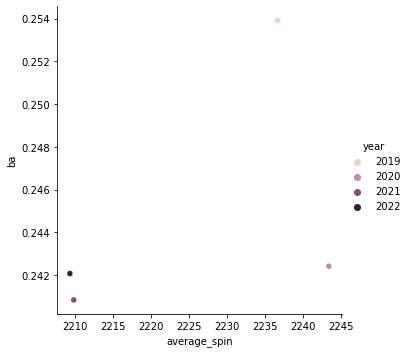

In [57]:
plt.figure(figsize=(20,15))
ax = sns.relplot(data=year, x='average_spin', y='ba', hue='year')

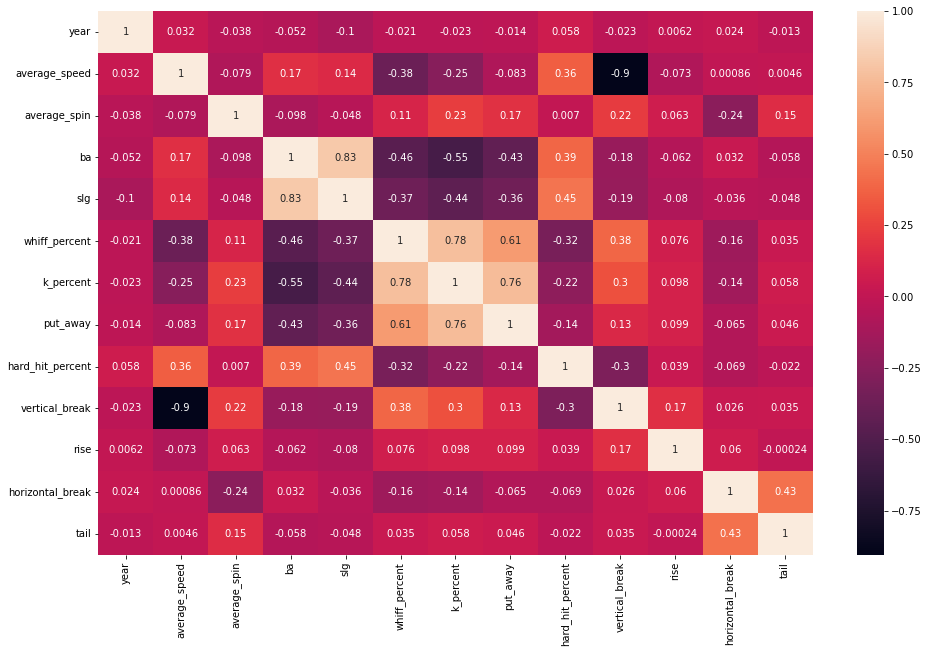

In [58]:
pit = Pitcher.corr()
plt.figure(figsize=(16,10))
ax = sns.heatmap(pit, annot=True)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [61]:
velocity_rate = pd.merge(velocity, spin_rate)

In [62]:
velocity_rate

,ff_avg_speed,si_avg_speed,fc_avg_speed,sl_avg_speed,ch_avg_speed,cu_avg_speed,fs_avg_speed,year,player_name,ff_avg_spin,si_avg_spin,fc_avg_spin,sl_avg_spin,ch_avg_spin,cu_avg_spin,fs_avg_spin
0,97.9,97.7,NaN,89.7,91.8,86.2,NaN,2022,Alcantara Sandy,2187.0,2282.0,NaN,2341.0,2045.0,2350.0,NaN
1,97.8,NaN,92.1,88.6,89.8,83.0,NaN,2022,Cole Gerrit,2443.0,NaN,2483.0,2583.0,1599.0,2802.0,NaN
2,96.2,96.3,95.0,87.9,90.3,81.8,NaN,2022,Burnes Corbin,2598.0,2489.0,2612.0,2792.0,1997.0,2755.0,NaN
3,93.6,92.9,NaN,87.8,82.6,76.1,NaN,2022,Mikolas Miles,2296.0,2234.0,NaN,2393.0,1574.0,2561.0,NaN
4,91.8,90.9,83.8,80.0,86.3,79.0,NaN,2022,Lyles Jordan,2203.0,2099.0,2440.0,2630.0,1464.0,2375.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,82.2,83.1,NaN,72.8,NaN,NaN,NaN,2019,Rogers Tyler,1850.0,1893.0,NaN,2294.0,NaN,NaN,NaN
2188,96.4,96.0,91.5,87.8,85.9,NaN,NaN,2019,Williams Devin,2341.0,2384.0,2252.0,1954.0,2625.0,NaN,NaN
2189,93.0,92.5,86.9,80.9,78.5,73.1,NaN,2019,Despaigne Odrisamer,2125.0,2159.0,2596.0,2770.0,1405.0,2773.0,NaN
2190,91.1,NaN,NaN,82.8,85.8,NaN,NaN,2019,Dull Ryan,2437.0,NaN,NaN,2622.0,1397.0,NaN,NaN


In [68]:
f = velocity_rate[['player_name','year','ff_avg_speed','ff_avg_spin']]
si = velocity_rate[['player_name','year','si_avg_speed', 'si_avg_spin']]
cut = velocity_rate[['player_name','year','fc_avg_speed', 'fc_avg_spin']]
cur = velocity_rate[['player_name','year','cu_avg_speed','cu_avg_spin']]
ch = velocity_rate[['player_name','year','ch_avg_speed', 'ch_avg_spin']]
sp = velocity_rate[['player_name','year','fs_avg_speed', 'fs_avg_spin']]
sl = velocity_rate[['player_name','year','sl_avg_speed', 'sl_avg_spin']]

In [64]:
ba

,pitch_name,pitches,ba,slg,whiff_percent,k_percent,put_away,hard_hit_percent,year,player_name
0,4-Seamer,1422,0.219,0.367,25.8,29.1,24.4,44.6,2022,Rodón Carlos
1,Cutter,1367,0.197,0.306,28.7,24.4,23.6,40.1,2022,Burnes Corbin
2,4-Seamer,1289,0.263,0.470,23.3,21.1,20.0,50.4,2022,Gilbert Logan
3,Sinker,1240,0.233,0.420,23.6,23.8,21.7,44.5,2022,Manaea Sean
4,4-Seamer,1175,0.204,0.385,19.5,17.9,17.5,47.9,2022,McKenzie Triston
...,...,...,...,...,...,...,...,...,...,...
2341,Curveball,113,0.300,0.600,24.0,10.0,14.3,33.3,2019,Gant John
2342,Changeup,55,0.400,1.100,48.0,10.0,12.5,33.3,2019,Tropeano Nick
2343,4-Seamer,42,0.111,0.111,21.7,30.0,15.8,16.7,2019,Castillo Diego
2344,Sinker,23,0.250,0.375,27.3,40.0,36.4,40.0,2019,Loup Aaron


In [65]:
fastball = ba.query('pitch_name == "4-Seamer"')
slider = ba.query('pitch_name == "Slider"')
cutter = ba.query('pitch_name == "Cutter"')
sinker = ba.query('pitch_name == "Sinker"')
changeup = ba.query('pitch_name == "Changeup"')
curveball = ba.query('pitch_name == "Curveball"')
splitter = ba.query('pitch_name == "Splitter"')

In [69]:
Fastball = pd.merge(f,fastball)
Slider = pd.merge(sl,slider)
Cutter = pd.merge(cut,cutter)
Sinker = pd.merge(si,sinker)
Changeup = pd.merge(ch,changeup)
Curveball = pd.merge(cur,curveball)
Splitter = pd.merge(sp,splitter)

In [70]:
fast = br.query('pitch_name == "4-Seamer"')
slide = br.query('pitch_name == "Slider"')
cutt = br.query('pitch_name == "Cutter"')
sink = br.query('pitch_name == "Sinker"')
change = br.query('pitch_name == "Changeup"')
curve = br.query('pitch_name == "Curveball"')
split = br.query('pitch_name == "Splitter"')

In [71]:
Fastball_data = pd.merge(Fastball,fast)
Slider_data = pd.merge(Slider,slide)
Cutter_data = pd.merge(Cutter,cutt)
Sinker_data = pd.merge(Sinker,sink)
Changeup_data = pd.merge(Changeup,change)
Curveball_data = pd.merge(Curveball, curve)
Splitter_data = pd.merge(Splitter, split)

In [72]:
Fastball_data

,player_name,year,ff_avg_speed,ff_avg_spin,pitch_name,pitches,ba,slg,whiff_percent,k_percent,put_away,hard_hit_percent,pitch_hand,vertical_break,rise,horizontal_break,tail
0,Alcantara Sandy,2022,97.9,2187.0,4-Seamer,650,0.219,0.411,22.6,21.9,18.4,44.6,R,14.8,-15,11.9,48
1,Cole Gerrit,2022,97.8,2443.0,4-Seamer,1270,0.211,0.378,30.1,36.0,25.4,43.3,R,10.5,19,10.4,29
2,Mikolas Miles,2022,93.6,2296.0,4-Seamer,606,0.208,0.342,21.4,29.4,20.5,44.7,R,16.6,-18,4.8,-19
3,Lyles Jordan,2022,91.8,2203.0,4-Seamer,799,0.297,0.538,19.6,14.0,13.4,51.6,R,15.5,1,5.9,-5
4,Gilbert Logan,2022,96.0,2132.0,4-Seamer,1289,0.263,0.470,23.3,21.1,20.0,50.4,R,12.1,6,6.5,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,Thorpe Lewis,2019,91.2,2017.0,4-Seamer,252,0.281,0.439,22.2,25.4,20.0,34.1,L,16.3,2,7.6,10
1597,Allen Cody,2019,92.2,2460.0,4-Seamer,264,0.314,0.784,15.2,17.1,19.4,60.0,R,13.3,18,10.8,49
1598,Johnson DJ,2019,93.2,2310.0,4-Seamer,307,0.271,0.354,20.1,16.9,13.8,34.2,R,16.7,-5,6.5,-9
1599,Boxberger Brad,2019,90.0,2212.0,4-Seamer,238,0.250,0.375,26.5,27.5,24.7,47.4,R,20.1,-8,5.5,-29


In [125]:
fs = Fastball_data.groupby('year',as_index=False).mean()

In [74]:
fs

,ff_avg_speed,ff_avg_spin,pitches,ba,slg,whiff_percent,k_percent,put_away,hard_hit_percent,vertical_break,rise,horizontal_break,tail
year,,,,,,,,,,,,,
2019,93.280139,2279.884527,547.080831,0.273316,0.501755,20.665589,21.113164,17.313626,41.939492,16.457968,-2.124711,7.519400,-1.293303
2020,93.293895,2291.058140,225.438953,0.253177,0.463314,22.446802,22.315698,18.411628,42.615116,15.905233,-2.031977,7.350000,-0.456395
2021,93.580238,2266.376190,529.169048,0.254383,0.449469,21.742857,22.181905,18.211905,43.789762,15.570952,-1.835714,7.459524,-0.590476
2022,93.809653,2262.141089,396.230198,0.251998,0.428809,21.524505,21.401733,17.403960,43.923515,15.589604,-1.804455,7.546287,2.388614


Text(31.485625, 0.5, 'Average Rise')

<Figure size 1152x720 with 0 Axes>

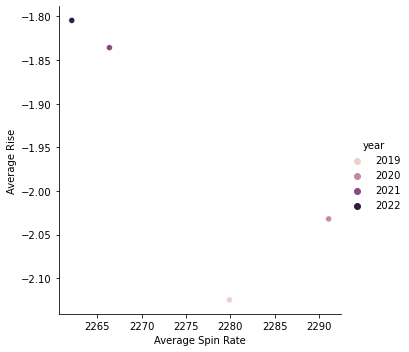

In [86]:
plt.figure(figsize=(16,10))
ax = sns.relplot(data=fs, x='ff_avg_spin', y='rise',hue='year')
plt.xlabel('Average Spin Rate')
plt.ylabel('Average Rise')

Text(6.799999999999997, 0.5, 'Batting Average')

<Figure size 1152x720 with 0 Axes>

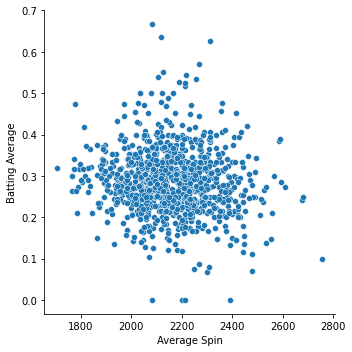

In [87]:
plt.figure(figsize=(16,10))
ax = sns.relplot(data=Sinker_data, x='si_avg_spin', y='ba')
plt.xlabel('Average Spin')
plt.ylabel('Batting Average')

In [124]:
sis = Sinker_data.groupby('year',as_index=False).mean()

Text(30.05489583333334, 0.5, 'Batting Average')

<Figure size 1152x720 with 0 Axes>

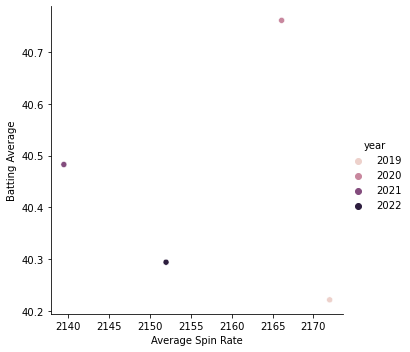

In [91]:
plt.figure(figsize=(16,10))
ax = sns.relplot(data=sis, x='si_avg_spin', y='hard_hit_percent',hue='year')
plt.xlabel('Average Spin Rate')
plt.ylabel('Batting Average')

Text(6.799999999999997, 0.5, 'Batting Average')

<Figure size 1152x720 with 0 Axes>

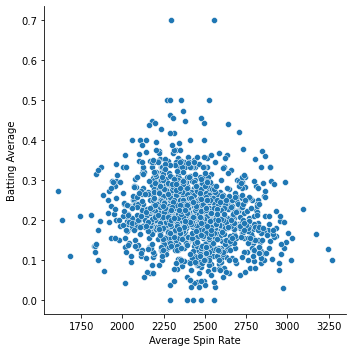

In [95]:
plt.figure(figsize=(16,10))
ax = sns.relplot(data=Slider_data, x='sl_avg_spin', y='ba')
plt.xlabel('Average Spin Rate')
plt.ylabel('Batting Average')

In [123]:
sl = Slider_data.groupby('year',as_index=False).mean()
sl

,year,sl_avg_speed,sl_avg_spin,pitches,ba,slg,whiff_percent,k_percent,put_away,hard_hit_percent,vertical_break,rise,horizontal_break,tail
0,2019,84.685546,2416.286136,337.112094,0.219298,0.390451,34.857227,30.678761,21.803540,31.730383,37.171091,-0.014749,5.718879,-0.831858
1,2020,84.216729,2427.583643,143.836431,0.211888,0.363424,35.996283,31.669517,21.610409,30.313011,37.355762,0.115242,6.054647,0.869888
2,2021,84.457459,2403.116022,326.878453,0.213171,0.368547,34.951381,30.531768,22.236188,32.947238,36.973481,0.320442,6.279006,-1.370166
3,2022,84.495531,2411.530726,277.206704,0.209050,0.345162,33.643296,28.986592,21.395810,32.441899,36.718156,0.111732,6.876816,-5.337989


Text(31.14395833333333, 0.5, 'Batting Average')

<Figure size 1152x720 with 0 Axes>

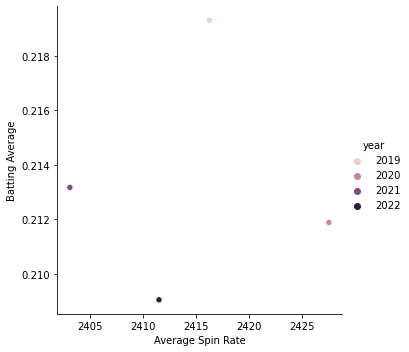

In [102]:
plt.figure(figsize=(16,10))
ax = sns.relplot(data=sl, x='sl_avg_spin', y='ba', hue='year')
plt.xlabel('Average Spin Rate')
plt.ylabel('Batting Average')

Text(6.799999999999997, 0.5, 'Batting Average')

<Figure size 1152x720 with 0 Axes>

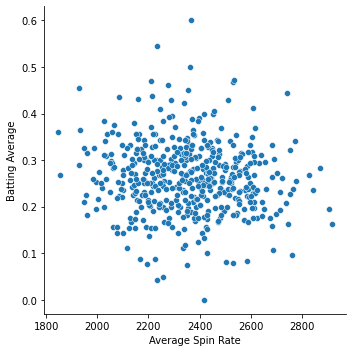

In [105]:
plt.figure(figsize=(16,10))
ax = sns.relplot(data=Cutter_data, x='fc_avg_spin', y='ba')
plt.xlabel('Average Spin Rate')
plt.ylabel('Batting Average')

In [121]:
cu = Cutter_data.groupby('year',as_index=False).mean()

Text(31.14395833333333, 0.5, 'Batting Average')

<Figure size 1152x720 with 0 Axes>

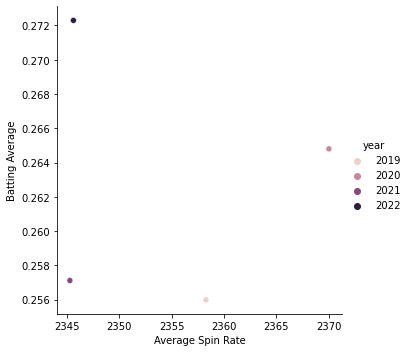

In [107]:
plt.figure(figsize=(16,10))
ax = sns.relplot(data=cu, x='fc_avg_spin', y='ba',hue='year')
plt.xlabel('Average Spin Rate')
plt.ylabel('Batting Average')

Text(6.799999999999997, 0.5, 'Batting Average')

<Figure size 1152x720 with 0 Axes>

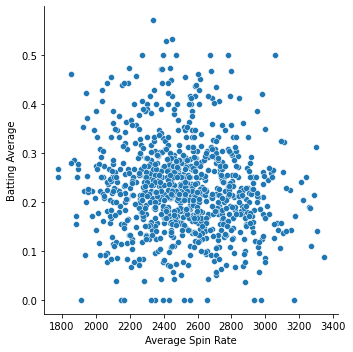

In [108]:
plt.figure(figsize=(16,10))
ax = sns.relplot(data=Curveball_data, x='cu_avg_spin', y='ba')
plt.xlabel('Average Spin Rate')
plt.ylabel('Batting Average')

In [122]:
cur = Curveball_data.groupby('year',as_index=False).mean()

Text(31.14395833333333, 0.5, 'Batting Average')

<Figure size 1152x720 with 0 Axes>

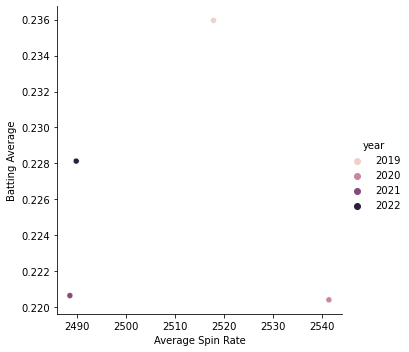

In [111]:
plt.figure(figsize=(16,10))
ax = sns.relplot(data=cur, x='cu_avg_spin', y='ba',hue='year')
plt.xlabel('Average Spin Rate')
plt.ylabel('Batting Average')

Text(6.799999999999997, 0.5, 'Batting Average')

<Figure size 1152x720 with 0 Axes>

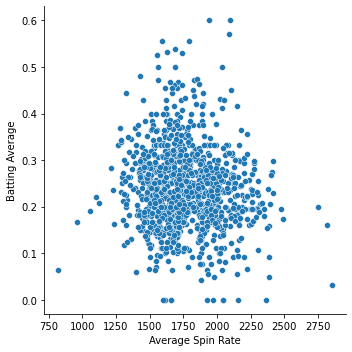

In [112]:
plt.figure(figsize=(16,10))
ax = sns.relplot(data=Changeup_data, x='ch_avg_spin', y='ba')
plt.xlabel('Average Spin Rate')
plt.ylabel('Batting Average')

In [118]:
ch = Changeup_data.groupby('year',as_index=False).mean()

Text(0, 0.5, 'Batting Average')

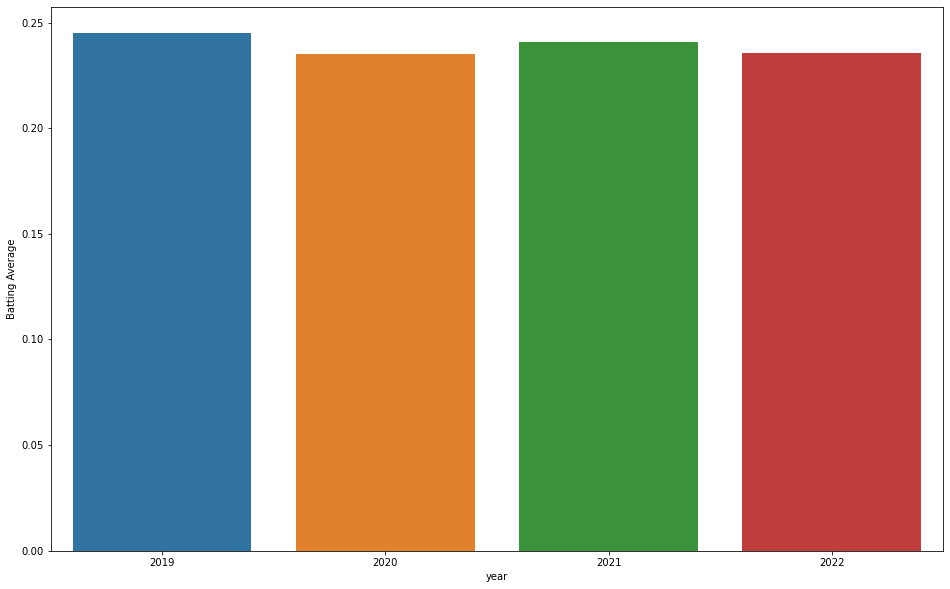

In [134]:
plt.figure(figsize=(16,10))
ax = sns.barplot(data=ch, x='year', y='ba')
plt.xlabel('year')
plt.ylabel('Batting Average')

Text(6.799999999999997, 0.5, 'Batting Average')

<Figure size 1152x720 with 0 Axes>

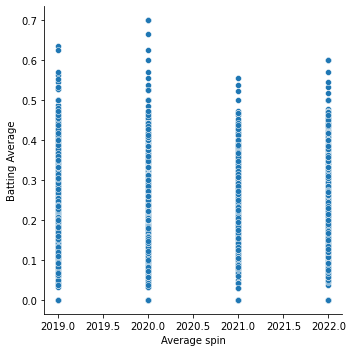

In [140]:
plt.figure(figsize=(16,10))
ax = sns.relplot(data=Baseball, x='year', y='ba')
plt.xlabel('Average spin')
plt.ylabel('Batting Average')

In [152]:
bse = Baseball.groupby('year',as_index=False).max()

Text(0.5, 1.0, 'Batting average and spin rate')

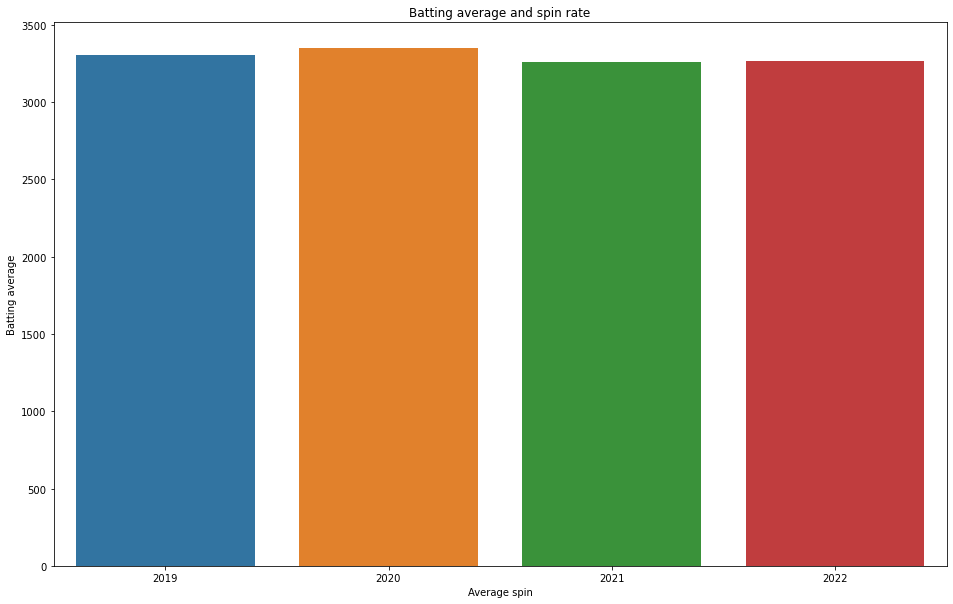

In [158]:
plt.figure(figsize=(16,10))
ax = sns.barplot(data=bse, x='year', y='average_spin')
plt.xlabel('year')
plt.ylabel('spin rate')
plt.title('Max spin rate')

In [173]:
cut = Cutter_data.groupby('year',as_index=False).mean()

Text(0.5, 1.0, 'Batting Average by year')

<Figure size 1152x720 with 0 Axes>

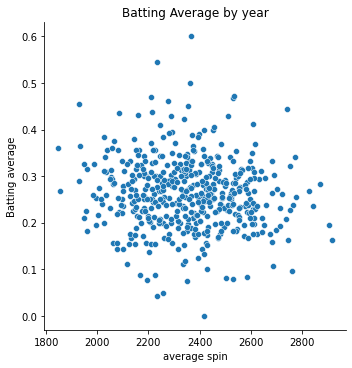

In [178]:
plt.figure(figsize=(16,10))
ax = sns.relplot(data=Cutter_data, x='fc_avg_spin', y='ba')
plt.xlabel('average spin')
plt.ylabel('Batting average')
plt.title('Batting Average by year')

Text(0.5, 1.0, 'Spin Average by year')

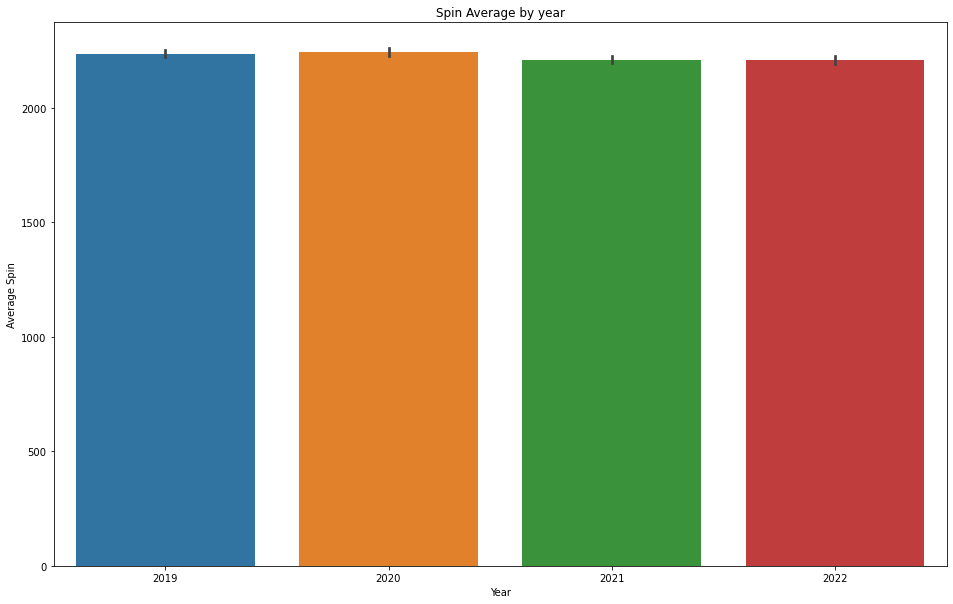

In [179]:
plt.figure(figsize=(16,10))
ax = sns.barplot(data=Pitcher, x='year', y='average_spin')
plt.xlabel('Year')
plt.ylabel('Average Spin')
plt.title('Spin Average by year')